# Bird Strikes From 2000 - 2011

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Bird Strikes.csv')
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,2,US AIRWAYS*,New York,Climb,None,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,None,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25429 non-null  object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [4]:
df.shape

(25558, 26)

In [5]:
df.isnull().sum()

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

In [6]:
# Here the null values is not under 5% so we can't able to remove the null values
df.isnull().sum().sum()/df.shape[0]

0.27525627983410283

### Aircraft: Type

In [7]:
# No point in keeping this columns since all the values are Aircraft
df['Aircraft: Type'].value_counts()

Airplane    25429
Name: Aircraft: Type, dtype: int64

In [8]:
df.drop(columns=['Aircraft: Type'],axis=1,inplace=True)

## Aircraft Name

In [9]:
# I checked there are no mispelled or out of the ordinary values in this features
df['Airport: Name'].nunique()

1109

In [10]:
# not a lot of null values and it can't be filled with mode since mostly values are unique
df.dropna(subset=['Airport: Name'],inplace=True)

### Altitute

In [11]:
# data is skewed towards '>1000 ft' but it'll still help in analysis
df['Altitude bin'].value_counts()

< 1000 ft    20556
> 1000 ft     4873
Name: Altitude bin, dtype: int64

In [12]:
# filling values based on mode
df['Altitude bin'] = df['Altitude bin'].str.strip()
df['Altitude bin'].fillna('< 1000 ft',inplace=True)

In [13]:
# Looks like those features with 129 mission values has a pattern of missingness and helped me save a lot of work
df.isnull().sum()

Record ID                                     0
Airport: Name                                 0
Altitude bin                                  0
Aircraft: Make/Model                          0
Wildlife: Number struck                       0
Wildlife: Number Struck Actual                0
Effect: Impact to flight                      0
FlightDate                                    0
Effect: Indicated Damage                      0
Aircraft: Number of engines?                234
Aircraft: Airline/Operator                    0
Origin State                                449
When: Phase of flight                         0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4761
Wildlife: Size                                0
Conditions: Sky                               0
Wildlife: Species                             0
Pilot warned of birds or wildlife?      

In [14]:
df.shape

(25429, 25)

### Aircraft: Make/Model

In [15]:
# lots of uniques values and also cleaned (not a single missplelled values) it will help in making tootips in the dashboard
df['Aircraft: Make/Model'].nunique()

324

### Wildlife: Number struck

<AxesSubplot:xlabel='Wildlife: Number struck', ylabel='count'>

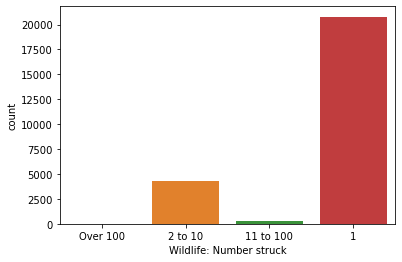

In [16]:
# This shows that birds inflicting flights problems are in less number
sns.countplot(df['Wildlife: Number struck'])

### Wildlife: Number Struck Actual

<AxesSubplot:xlabel='Wildlife: Number Struck Actual', ylabel='Density'>

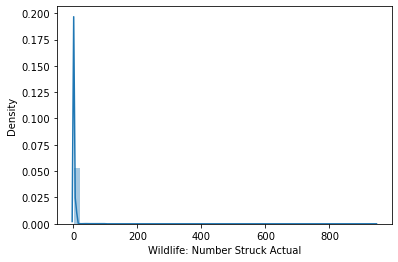

In [17]:
# even the 'actual numbers of wildlife struck' shows that less numbers of birds is enought to induce problems in flights
# no point in removing outliers since mostly data is looking highly skewed means removing outliers will remove major chunk of the data
sns.distplot(df['Wildlife: Number Struck Actual'])

## Effect: Impact to flight

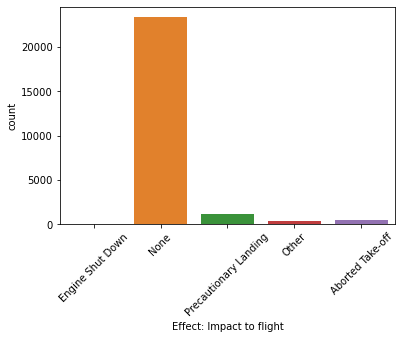

In [18]:
# There is lot less chance of having engine shut down which shows the durability of the flights made in 2000 - 2011.
# Main focus of production of flights are focused on safety of passenegers Could be the reason behind is 9/11
# incident happened in 2001 in New York
sns.countplot(df['Effect: Impact to flight'])
plt.xticks(rotation=45)
plt.show()

### FlightDate

In [19]:
# Changing type of FLight Date to date time
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

In [20]:
df['FlightDate'].head()

0   2000-11-23
1   2001-07-25
2   2001-09-14
3   2002-09-05
4   2003-06-23
Name: FlightDate, dtype: datetime64[ns]

### Effect: Indicated Damage

In [21]:
# If I were to do prediction on this, this feature would create problem since 'caused damange' incidents are low
df['Effect: Indicated Damage'].value_counts()

No damage        22975
Caused damage     2454
Name: Effect: Indicated Damage, dtype: int64

In [22]:
# C is a wrong entry better if I remove it
df['Aircraft: Number of engines?'].value_counts()

2    23002
1     1240
3      564
4      388
C        1
Name: Aircraft: Number of engines?, dtype: int64

In [23]:
df = df[df['Aircraft: Number of engines?'] != "C"]

In [24]:
# Filling na values with mode
df['Aircraft: Number of engines?'].isna().sum()

234

In [25]:
df['Aircraft: Number of engines?'].fillna('2',inplace=True)

In [26]:
df['Aircraft: Number of engines?'] = df['Aircraft: Number of engines?'].astype('int')

## Origin State

In [27]:
# removing null values since it is small portion of the data
df['Origin State'].isnull().sum()

449

In [28]:
df.dropna(subset=['Origin State'],inplace=True)

In [29]:
# most of the flights are from california
df['Origin State'].value_counts().head()

California    2499
Texas         2445
Florida       2045
New York      1316
Illinois      1007
Name: Origin State, dtype: int64

### When: Phase of flight bird struck

In [30]:
# Most of the birds strike is at Approach phase of the flights
df['When: Phase of flight'].value_counts()

Approach        10227
Landing Roll     5004
Take-off run     4614
Climb            4285
Descent           766
Taxi               73
Parked             10
Name: When: Phase of flight, dtype: int64

### Conditions: Precipitation

In [31]:
# When sky is clear is when mostly the birds are struck 
df['Conditions: Precipitation'].value_counts()

None               22990
Rain                1328
Fog                  475
Snow                  88
Fog, Rain             85
Rain, Snow             6
Fog, Snow              4
Fog, Rain, Snow        3
Name: Conditions: Precipitation, dtype: int64

### Remains of wildlife collected?

In [32]:
# Mostly wildlife is incinerated in the engine 
df['Remains of wildlife collected?'].value_counts()

False    18197
True      6782
Name: Remains of wildlife collected?, dtype: int64

## Remains of wildlife sent to Museum

In [33]:
df['Remains of wildlife sent to Smithsonian'].value_counts()

False    23035
True      1944
Name: Remains of wildlife sent to Smithsonian, dtype: int64

### Remains of wildlife sent to Museum when no wildlife is collected

In [34]:
# how it can be when no wildlife is recovered it still got sent to the museum 
df[(df['Remains of wildlife collected?'] == False) & (df['Remains of wildlife sent to Smithsonian'] == True)]

,Record ID,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
2638,259571,FORT LAUDERDALE EXECUTIVE ARPT,> 1000 ft,CIRRUS SR 20/22,2 to 10,9,Precautionary Landing,2008-09-26,Caused damage,1,BUSINESS,Florida,Climb,None,False,True,"ID BY SMITHSONIAN VIA PHOTO, FAA2 713. PROP DE...",Medium,Overcast,Anhinga,N,0,"2,500",1,No


##### Remarks by that aircraft

In [35]:
df.loc[2638,'Remarks']

"ID BY SMITHSONIAN VIA PHOTO, FAA2 713. PROP DE-ICE BOOT ON 2 BLADES WAS DAMAGED, PAINT & POSSIBLE FIBERGLASS DAMAGE ON LWR L ENG COWL. BROKEN WINDSHLD. BIRD ENTERED COCKPIT, STRIKING PILOT'S FACE. HE RECEIVED 4 STITCHES ABOVE EYEBROW. SHEET METAL ROUND LE"

In [36]:
# removing outlier 
df = df[~((df['Remains of wildlife collected?'] == False) & (df['Remains of wildlife sent to Smithsonian'] == True))]

## Remarks

In [37]:
df['Remarks'].nunique()

17785

In [38]:
# We can remove these values since its more than 5% of the data so we can just keep it for tooltips in dashboards
df.Remarks.isnull().sum()

4665

## Wildlife: Size

In [39]:
# Small wildlife is problematic in most of the cases
df["Wildlife: Size"].value_counts()

Small     17139
Medium     5802
Large      2037
Name: Wildlife: Size, dtype: int64

<AxesSubplot:xlabel='Wildlife: Size', ylabel='count'>

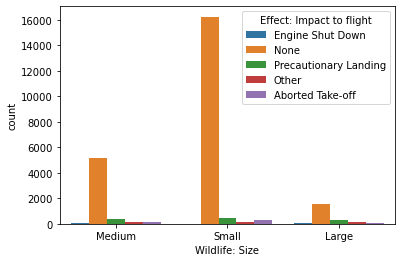

In [40]:
# None Imact to flights happens mostly even if the small wildlife struck
sns.countplot(data=df, x='Wildlife: Size', hue='Effect: Impact to flight')

### Conditions: Sky

<AxesSubplot:xlabel='Conditions: Sky', ylabel='count'>

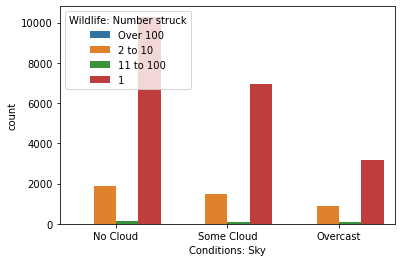

In [41]:
# Mostly 1 wildlife is struck when sky there are no clouds 
sns.countplot(data=df, x='Conditions: Sky',hue="Wildlife: Number struck")

In [42]:
# Mourning Dove and European Starling species is mostly recognized in the US 
df['Wildlife: Species'].value_counts().head()

Unknown bird - small     10180
Unknown bird - medium     4169
Mourning dove              897
European starling          883
Unknown bird - large       759
Name: Wildlife: Species, dtype: int64

### When no remains of wildlife is collected mostly bird species is unnkown

In [43]:
temp = df[df['Remains of wildlife collected?'] == False]
temp['Wildlife: Species'].value_counts().head()

Unknown bird - small     9615
Unknown bird - medium    4024
Unknown bird - large      722
European starling         498
Mourning dove             418
Name: Wildlife: Species, dtype: int64

### Pilot warned of birds or wildlife?

<AxesSubplot:xlabel='Pilot warned of birds or wildlife?', ylabel='count'>

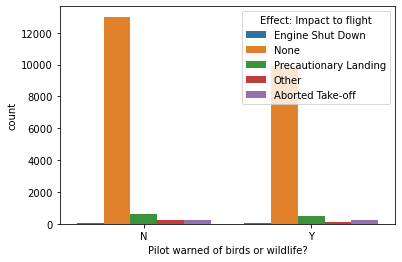

In [44]:
# Even when the pilot is not warned still most aiplanes dont run into much problems
sns.countplot(data=df, x='Pilot warned of birds or wildlife?',hue='Effect: Impact to flight')

### Cost: Total $

In [45]:
# cleaning 'Cost: Total $' and changing into integer
df['Cost: Total $'] = df['Cost: Total $'].str.replace(',','').astype('int')

<AxesSubplot:xlabel='Cost: Total $', ylabel='Density'>

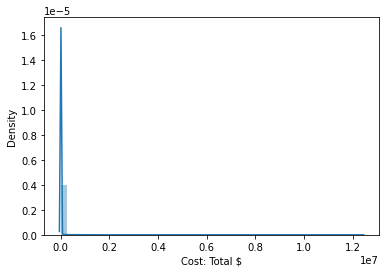

In [46]:
# Airplane damage cost because of an impact of birds is negligible is most cases since mostly small birds struck and no action is taken 
# this is highly skewed data but removing these outliers will loose a lot of information 
sns.distplot(df['Cost: Total $'])

### Feet above ground

In [47]:
# cleaning 'Feet above ground' and changing into integer
df['Feet above ground'] = df['Feet above ground'].str.replace(',','').astype('int')

<AxesSubplot:xlabel='Feet above ground', ylabel='Density'>

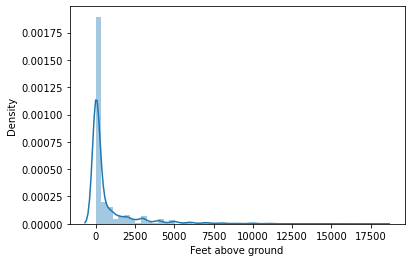

In [48]:
# Birds strikes are higher when A flight is under inspection and engine is running
sns.distplot(df['Feet above ground'])

### Number of people injured

In [49]:
# This shows that flights made are mostly made in focus of safety of people and very durable
# Also no need to do discretization on this since this is already only have 4 categories
df['Number of people injured'].value_counts()

0    24966
1        8
2        3
6        1
Name: Number of people injured, dtype: int64

### Is Aircraft Large?

In [50]:
df['Is Aircraft Large?'].value_counts()

No     16798
Yes     8180
Name: Is Aircraft Large?, dtype: int64

<AxesSubplot:xlabel='Is Aircraft Large?', ylabel='count'>

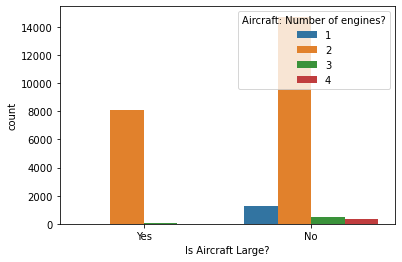

In [51]:
# Aircraft with > 1 engines are considered large
sns.countplot(data=df, x='Is Aircraft Large?',hue='Aircraft: Number of engines?')

# Checking if everything is right

In [52]:
df.isnull().sum()

Record ID                                     0
Airport: Name                                 0
Altitude bin                                  0
Aircraft: Make/Model                          0
Wildlife: Number struck                       0
Wildlife: Number Struck Actual                0
Effect: Impact to flight                      0
FlightDate                                    0
Effect: Indicated Damage                      0
Aircraft: Number of engines?                  0
Aircraft: Airline/Operator                    0
Origin State                                  0
When: Phase of flight                         0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4665
Wildlife: Size                                0
Conditions: Sky                               0
Wildlife: Species                             0
Pilot warned of birds or wildlife?      

In [53]:
# Not a lot of values got removed 
df.shape

(24978, 25)

# Exporting the data

In [54]:
df.to_csv('Cleaned_Bird_Strikes.csv')